# The Dias (2000) model

## Introduction

The model proposed by [Dias (1972)](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/JB077i026p04945)
describes the petrophysical properties of rocks from measurements of their
electrical polarization in a frequency range typically from
1 mHz to 100 kHz.

We refer to [Dias (2000)](https://library.seg.org/doi/10.1190/1.1444738)
for the implementation of the complex resistivity formula in BISIP. This model
predicts that the complex resistivity spectra $\rho^*$ of a
polarizable rock sample can be described by

\begin{equation}
\rho^* = \rho_0 \left[ 1-m\left(1-\frac{1}{1+i\omega\tau'(1+\frac{1}{\mu})} \right) \right],
\end{equation}

where $\omega$ is the measurement angular frequencies
($\omega=2\pi f$) and $i$ is the imaginary unit. Additionally,

\begin{equation}
    \mu = i\omega\tau + \left(i\omega\tau''\right)^{1/2}, \\
    \tau' = (\tau/\delta)(1 - \delta)/(1 - m), \\
    \tau'' = \tau^2 \eta^2.
\end{equation}

Here, $\rho^*$ depends on 5 parameters:

- $\rho_0 \in [0, \infty)$, the direct current resistivity $\rho_0 = \rho^*(\omega\to 0)$.
- $m \in [0, 1)$, the chargeability $m=(\rho_0 - \rho_\infty)/\rho_0$.
- $\tau \in [0, \infty)$, the relaxation time, related to
  average polarizable particle size.
- $\eta \in [0, 150]$, characteristic of the
  electrochemical environment producing polarization.
- $\delta \in [0, 1)$, the pore length fraction of the electrical double
  layer zone in the material.

In this tutorial we will invert a SIP data with the Dias model to explore the
parameter space of this semi-empirical SIP model. We will also quantify the
relationship between the various parameters.

## Exploring the parameter space

In [5]:
import os

import bisip
from bisip import Dias2000


# This will get one of the example data files in the BISIP package
fp = f'data/SIP-K389172.dat'
fp = os.path.join(os.path.dirname(bisip.__file__), fp)

# Define MCMC parameters and Dias model
nwalkers = 32
nsteps = 2000
model = Dias2000(filepath=fp, nwalkers=nwalkers, nsteps=nsteps)
# Fit model to data
model.fit()

100%|██████████| 2000/2000 [00:03<00:00, 598.34it/s]


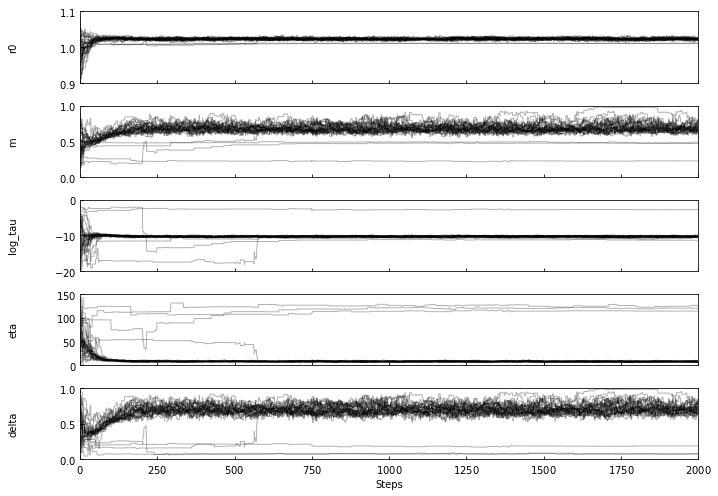

In [8]:
fig = model.plot_traces()
fig.savefig('./figures/dias/dias_wide_traces.png', dpi=144, bbox_inches='tight')